In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# data= fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
data = load_iris()
data

In [2]:
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [49]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(estimators=[
                                        ('log_reg',LogisticRegression()),
                                        ('knn',KNeighborsClassifier()),
                                        ('GaussianNB',GaussianNB())
                                        ],
                          voting='hard', # soft
                          weights=None, # weights for each classifier as a list
                          n_jobs=2,
                          flatten_transform=True # only relevant for soft voting
                          )

vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                           

In [50]:
for estimator,est_name in zip(vote_clf.estimators_,vote_clf.named_estimators_):
    print(f'{est_name}:',round(estimator.score(X_test,y_test.astype(int)),3))

log_reg: 0.925
knn: 0.973
GaussianNB: 0.55


In [51]:
print('Voting classifier:',round(vote_clf.score(X_test,y_test),3))

Voting classifier: 0.943


In [53]:
vote_clf_soft = VotingClassifier(estimators=[
                                        ('log_reg',LogisticRegression()),
                                        ('knn',KNeighborsClassifier()),
                                        ('GaussianNB',GaussianNB())
                                        ],
                          voting='soft', # soft
                          weights=None, # weights for each classifier as a list
                          n_jobs=2,
                          flatten_transform=True # only relevant for soft voting
                          )

vote_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                           

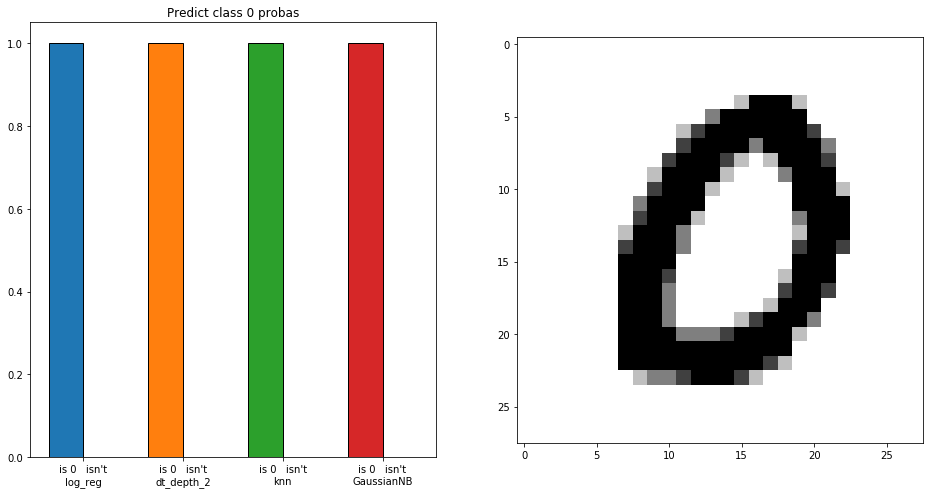

In [63]:
ind = 1

probas = []
for estimator,est_name in zip(vote_clf_soft.estimators_,vote_clf.named_estimators_):
    probas.append(estimator.predict_proba(X_test[ind:ind+1]))

probas.append(vote_clf_soft.predict_proba(X_test[ind:ind+1]))

pred_class = int(y_test.values[ind])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
i = 0
w = 0.35
for prob in probas:
    predNot = 0
    predIs = 0
    for k in range(len(prob[0])):
        if k == pred_class:
            predIs += prob[0, k]
        else:
            predNot += prob[0, k]
    plt.bar([i-w/2,i+w/2],height=[predIs,predNot],width=w,edgecolor='black')
    i +=1

plt.xticks(range(len(probas)),[f'is {pred_class}   isn\'t\nlog_reg',f'is {pred_class}   isn\'t\ndt_depth_2',
                               f'is {pred_class}   isn\'t\nknn',f'is {pred_class}   isn\'t\nGaussianNB',
                               f'is {pred_class}   isn\'t\nsoft vote'])
plt.title(f"Predict class {pred_class} probas")
ax = fig.add_subplot(122)
plt.imshow(X_test.iloc[ind].astype(int).values.reshape(28,-1),cmap=plt.get_cmap('gray_r'))
plt.show()

In [ ]:
probas

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

data = load_boston()
data.keys()

X, y = data["data"], data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe = Pipeline([('std_scl',StandardScaler())])
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

X_train = pd.DataFrame(X_train,columns=data["feature_names"])
X_test = pd.DataFrame(X_test,columns=data["feature_names"])
y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbor import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

vote_reg = VotingRegressor([('knn_reg',KNeighborsRegressor()),
                            ('Ridge_reg',Ridge()),
                            ('dt_reg',DecisionTreeRegressor(max_depth=3))
                           ],
                          weights=None,
                          n_jobs=2)
vote_reg.fit(X_train, y_train)

In [ ]:
for estimator,est_name in zip(vote_reg.estimators_,vote_clf.named_estimators_):
    print(f'{est_name}:',round(estimator.score(X_test,y_test),3))

In [ ]:
print('Voting regressor:',round(vote_reg.score(X_test,y_test),3))